In [5]:
suppressMessages(source("../src/R/load_data.R"))

Warning message:
"Missing column names filled in: 'X1' [1]"


[1] 1398   30
Dataset is loaded to naming, wdata, nwdata

In [6]:
require(semTools)
require(lavaan)
require(piecewiseSEM)
require(partykit)
require(mgcv)
require(itsadug)
require(languageR)

In [7]:
## helper function to plot interaction
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }
plot_int = function(model, idx, x, y, ...){
    popt(12, 6)
    par(mfrow=c(1,2))
    plot(model, select=idx, lwd=2, ...)
    vis.gam(model, view=c(x, y), plot.type="contour", color="topo", too.far=0.1, ...)
}

In [8]:
dim(naming)

[1] 1053   58

In [9]:
names(naming)

[1] "Character"              "zhuyin"                 "Phonetic Component"    
 [4] "Semantic Component"     "Frequency"              "Consistency (type)"    
 [7] "Consistency (token)"    "Regularity"             "Homophone Density"     
[10] "Phonetic Combinability" "Semantic Combinability" "Stroke"                
[13] "Familiarity"            "sar"                    "NC1"                   
[16] "NC2"                    "Naming Acc"             "RT"                    
[19] "word"                   "n_sense"                "log_n_sense"           
[22] "n_tagged"               "sfreq_sum"              "sfreq_max"             
[25] "sfreq_std"              "sfreq_ent"              "sfreq_ent_norm"        
[28] "vol_raw"                "vol_cen"                "vol_cennorm"           
[31] "Stop"                   "Affricate"              "Fricative"             
[34] "Nasal"                  "Liquid"                 "Aspirated"             
[37] "Voiced"                 "Bilabial"               "LabioDental"           
[40] "Alveolar"               "PalatalAlveolar"        "AlveloPalatal"         
[43] "Velar"                  "log_freq"               "RTinv"                 
[46] "sf_rmax"                "mw_nV"                  "mw_nE"                 
[49] "mw_weightD"             "mw_D"                   "rEV"                   
[52] "CD"                     "log_CD"                 "SemD"                  
[55] "SemVar"                 "SemVarRes"              "Witin-group distance"  
[58] "Between-group distance"

In [10]:
sa = naming[, strsplit("log_freq,sar,log_n_sense,sfreq_ent_norm,mw_weightD,rEV,log_CD,SemD,SemVar", ",")[[1]]]
sa_scaled = apply(sa, 2, scale)
dim(sa)

[1] 1053    9

In [11]:
names(sa)

[1] "log_freq"       "sar"            "log_n_sense"    "sfreq_ent_norm"
[5] "mw_weightD"     "rEV"            "log_CD"         "SemD"          
[9] "SemVar"

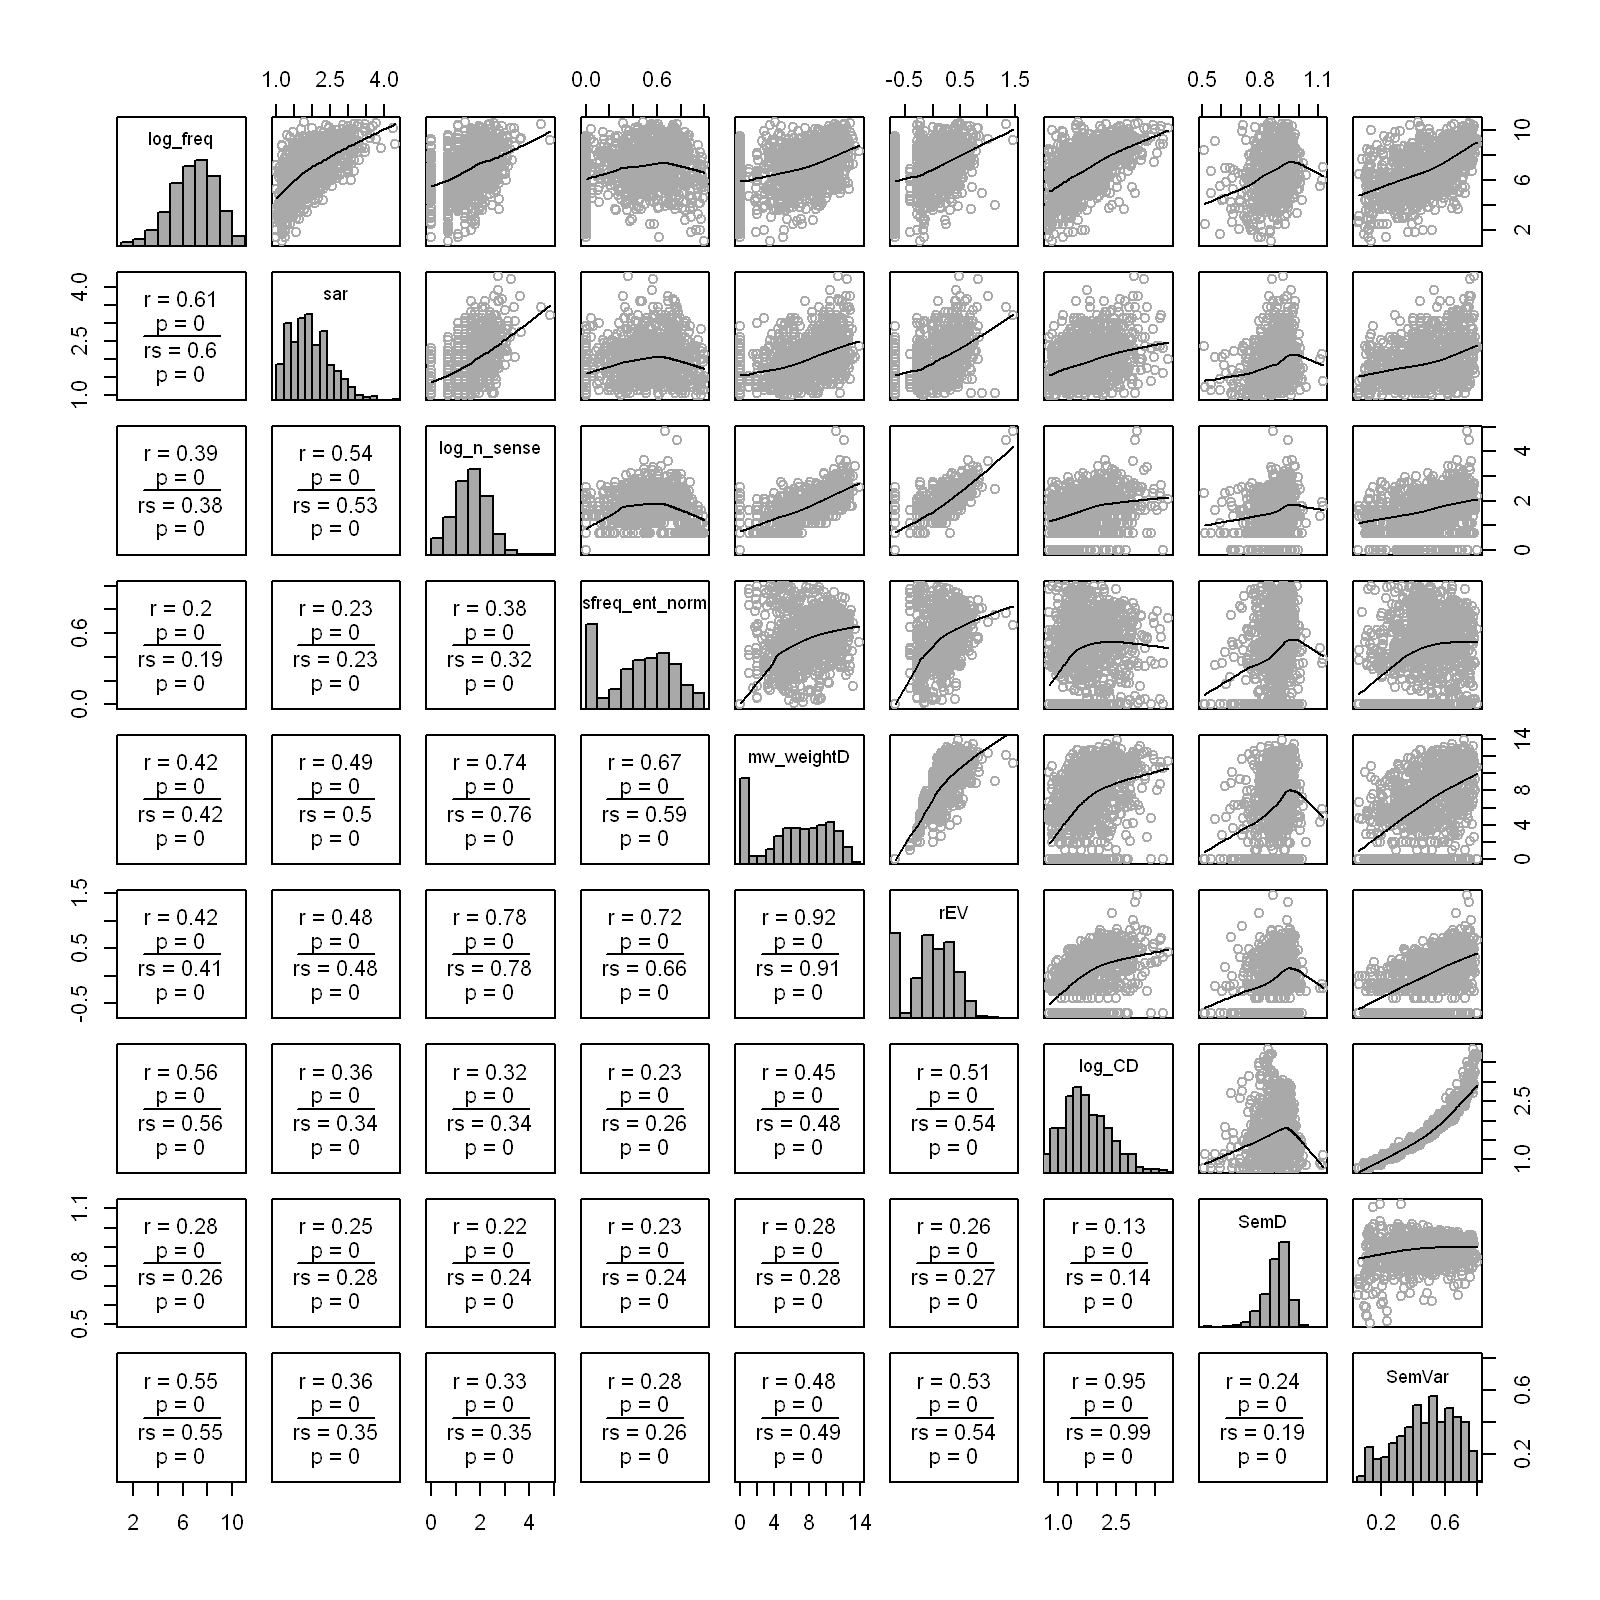

In [12]:
popt(8, 8)
pairscor.fnc(sa)

In [13]:
model = '
sar~log_n_sense+log_CD
log_CD ~ log_n_sense
'
sem_fit = sem(model, naming, estimator="ML")
parameterEstimates(sem_fit)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sar,~,log_n_sense,0.3660270,0.020694811,17.686900,0.000000e+00,0.3254660,0.4065881
sar,~,log_CD,0.1966090,0.025267318,7.781157,7.105427e-15,0.1470859,0.2461320
log_CD,~,log_n_sense,0.2633611,0.023899497,11.019524,0.000000e+00,0.2165189,0.3102032
sar,~~,sar,0.2139814,0.009325602,22.945588,0.000000e+00,0.1957036,0.2322593
log_CD,~~,log_CD,0.3182947,0.013871717,22.945588,0.000000e+00,0.2911066,0.3454828
log_n_sense,~~,log_n_sense,0.5292045,0.000000000,NA,NA,0.5292045,0.5292045


In [42]:
mf.0_model = '
sar~log_n_sense+log_CD+log_freq
log_CD ~ log_n_sense
'
mf.0 = sem(mf.0_model, naming, estimator="ML")
print(fitMeasures(mf.0, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(mf.0, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   1.000  308.001 2892.055    0.540    0.155    0.722    0.722 
lavaan 0.6-8 ended normally after 17 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         6
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                               308.001
  Degrees of freedom                                 1
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [39]:
mf.1_model = '
sar~log_n_sense+log_CD
log_CD ~ log_n_sense
log_freq~sar
'
mf.1 = sem(mf.1_model, naming, estimator="ML")
print(fitMeasures(mf.1, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(mf.1, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   2.000  259.377 6859.727    0.350    0.111    0.798    0.798 
lavaan 0.6-8 ended normally after 20 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         7
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                               259.377
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [78]:
model_spec = '
RTinv ~ log_freq+sar+log_n_sense+rEV
log_freq ~ sar + log_CD
sar ~ log_CD + log_n_sense+rEV
'
mr.1 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   3.000    7.156 3226.490    0.036    0.011    0.997    0.995 
lavaan 0.6-8 ended normally after 34 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                 7.156
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.067

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

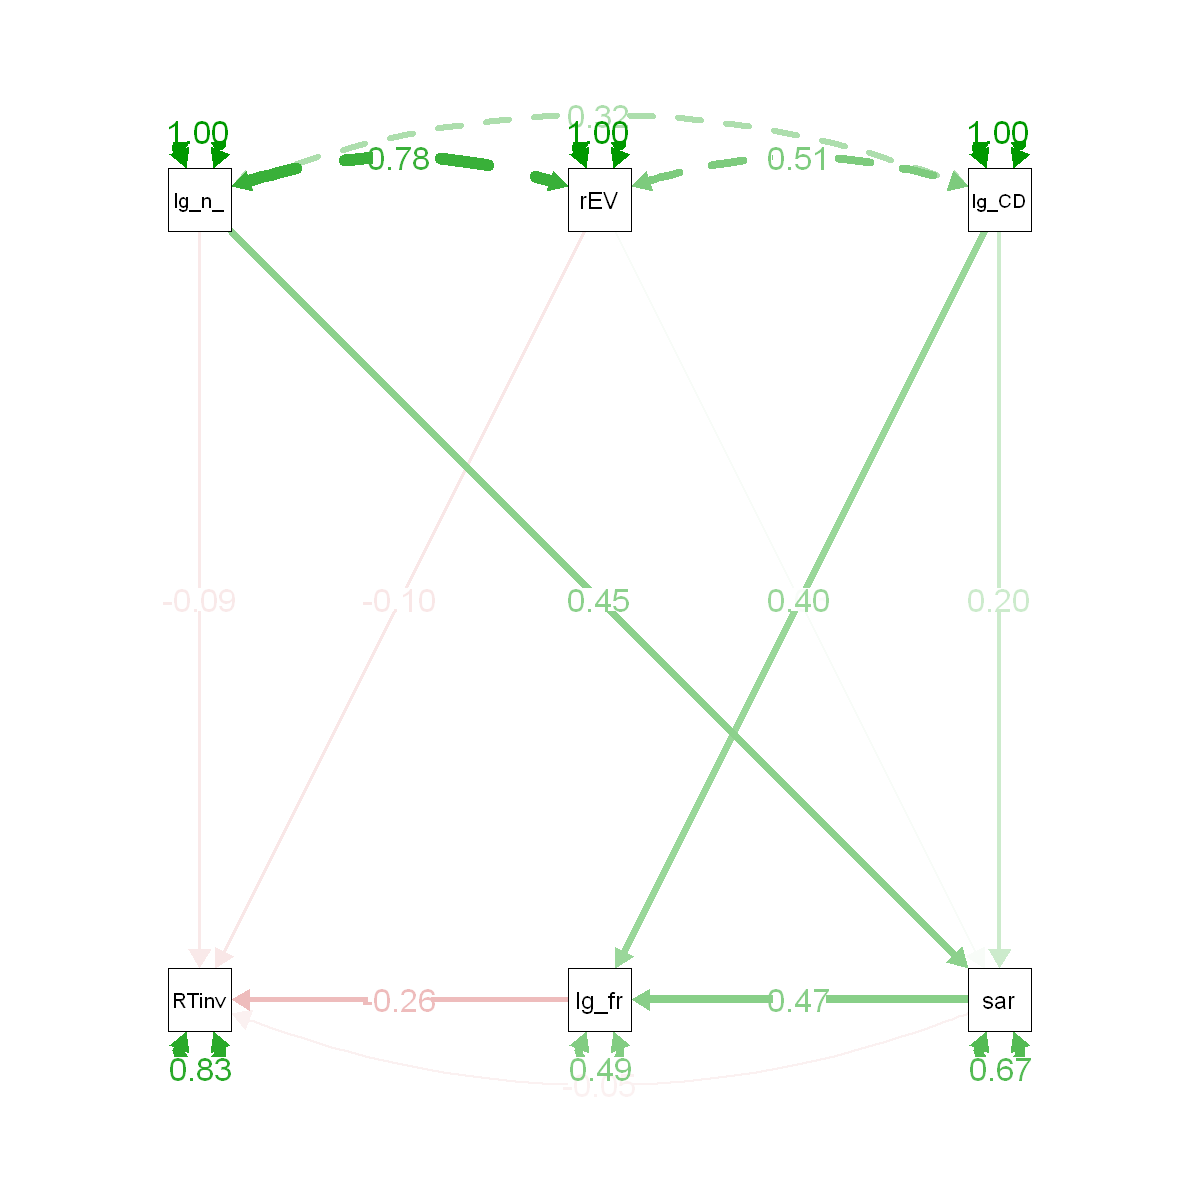

In [86]:
require(semPlot)
popt(6,6)
semPaths(mr.1, "std", edge.label.cex=1, nCharNodes=5)

In [89]:
model_spec = '
RTinv ~ log_freq+sar+log_n_sense+rEV+mw_weightD
log_freq ~ sar + log_CD
sar ~ log_CD + log_n_sense+rEV+mw_weightD
'
mr.2 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   4.000   16.054 3217.793    0.053    0.010    0.991    0.988 
lavaan 0.6-8 ended normally after 40 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        14
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                16.054
  Degrees of freedom                                 4
  P-value (Chi-square)                           0.003

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [133]:
model_spec = '
RTinv ~ log_freq + sar
log_freq ~ sar + log_n_sense + log_CD + rEV + mw_weightD
sar ~ log_CD + log_n_sense + mw_weightD
'
mr.3 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   5.000   36.922 3236.661    0.078    0.039    0.977    0.973 
lavaan 0.6-8 ended normally after 41 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                36.922
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

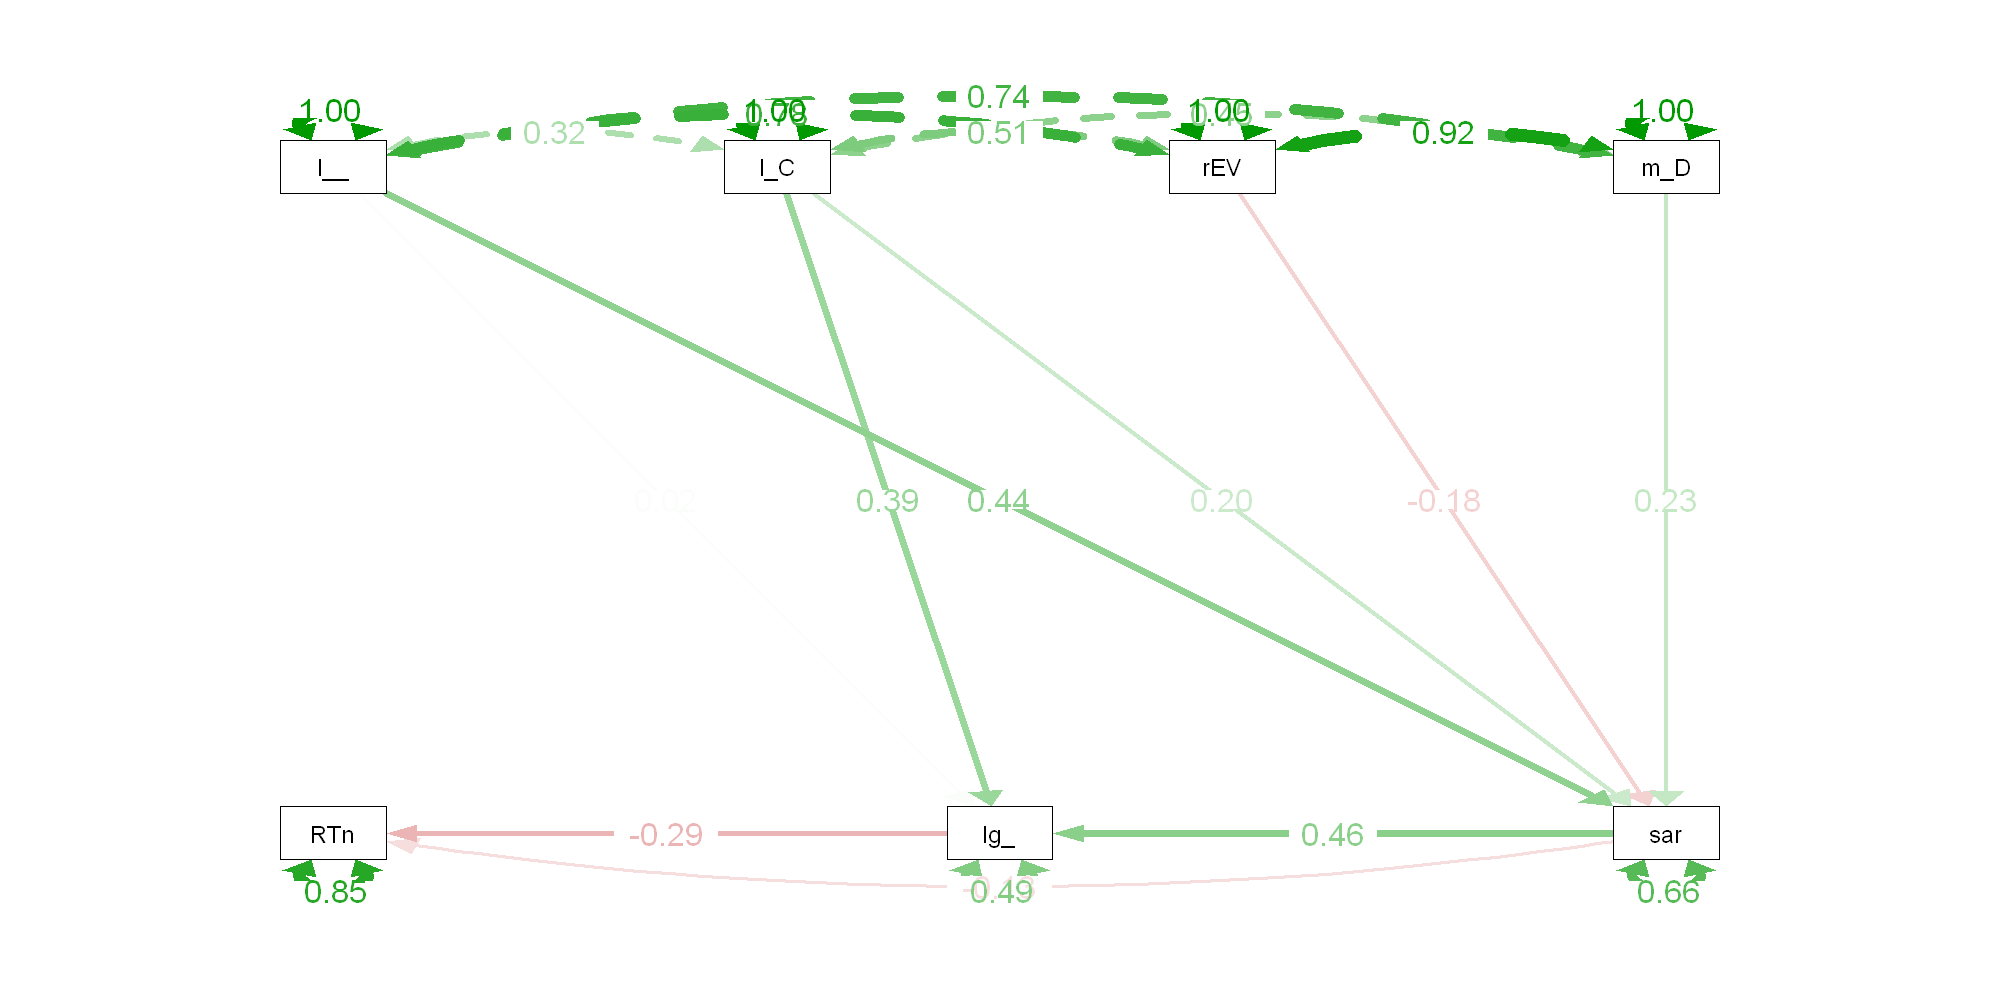

In [117]:
popt(10,5)
semPaths(mr.3, "std", edge.label.cex=1)

In [136]:
print(modindices(mr.3, sort=T))

           lhs op         rhs     mi    epc sepc.lv sepc.all sepc.nox
25       RTinv ~~         sar 29.509  0.016   0.016    0.302    0.302
32         sar  ~       RTinv 28.458  1.192   1.192    0.262    0.262
29       RTinv  ~         rEV 22.620 -0.047  -0.047   -0.159   -0.376
27       RTinv  ~ log_n_sense 21.077 -0.027  -0.027   -0.156   -0.214
30       RTinv  ~  mw_weightD 18.926 -0.004  -0.004   -0.144   -0.036
24       RTinv ~~    log_freq 12.430  0.032   0.032    0.228    0.228
31    log_freq  ~       RTinv 12.430  2.450   2.450    0.172    0.172
28       RTinv  ~      log_CD 12.037 -0.025  -0.025   -0.120   -0.201
34         sar  ~         rEV  5.965 -0.237  -0.237   -0.178   -0.421
33         sar  ~    log_freq  5.965  0.289   0.289    0.904    0.904
55  mw_weightD  ~         sar  2.654  0.143   0.143    0.020    0.020
49         rEV  ~         sar  2.654 -0.011  -0.011   -0.014   -0.014
37 log_n_sense  ~         sar  2.654  0.087   0.087    0.067    0.067
43      log_CD  ~   

In [167]:
model_spec = '
RTinv ~ log_freq + log_n_sense 
log_freq ~ sar + log_CD 
sar ~ log_CD + log_n_sense + mw_weightD
'
mr.4 <- fit <- sem(model_spec, naming, estimator="ML")
print(fitMeasures(fit, strsplit("df,chisq,AIC,RMSEA,SRMR,CFI,NFI", ",")[[1]]))
summary(fit, std=T)

      df    chisq      aic    rmsea     srmr      cfi      nfi 
   5.000   12.582 3222.270    0.038    0.018    0.994    0.991 
lavaan 0.6-8 ended normally after 32 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                12.582
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.028

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P

In [144]:
cf = cforest(sar~log_n_sense+rEV+mw_weightD, sa, mtry=2, ntree=100)

In [19]:
preds = predict(cf, newdata=sa, "response")

In [130]:
cf.imp = varimp(cf)

In [131]:
cf.imp

log_n_sense         rEV  mw_weightD 
 0.05013014  0.01035791  0.03126264

In [32]:
class(ct)

[1] "constparty" "party"

In [42]:
length(predict(ct, newdata=sa[3:4,], FUN=function(y, w) list(y,w))[[2]][[1]])

[1] 212

In [29]:
apply(sa, 2, skew)

,log_freq,sar,log_n_sense,sfreq_ent_norm,mw_weightD,rEV,SemD,SemVar
skew (g1),-3.557476e-01,5.932121e-01,0.3119347064,-0.15231167,-0.21122755,4.113684e-01,-1.04718317,-4.154130e-01
se,8.441499e-02,8.441499e-02,0.0844149912,0.08441499,0.08441499,8.441499e-02,0.08441499,8.441499e-02
z,-4.214271e+00,7.027331e+00,3.6952524899,-1.80432018,-2.50225166,4.873168e+00,-12.40518017,-4.921081e+00
p,2.505868e-05,2.105205e-12,0.0002196684,0.07118113,0.01234062,1.098228e-06,0.00000000,8.606738e-07


In [30]:
apply(sa, 2, kurtosis)

,log_freq,sar,log_n_sense,sfreq_ent_norm,mw_weightD,rEV,SemD,SemVar
Excess Kur (g2),-0.008691455,0.2771736,6.849290e-01,-0.467548357,-8.246496e-01,0.0410919,2.841763,-0.554559351
se,0.168829982,0.1688300,1.688300e-01,0.168829982,1.688300e-01,0.1688300,0.168830,0.168829982
z,-0.051480516,1.6417318,4.056916e+00,-2.769344347,-4.884497e+00,0.2433922,16.832098,-3.284720779
p,0.958942627,0.1006456,4.972504e-05,0.005616924,1.036931e-06,0.8077016,0.000000,0.001020835


In [8]:
model = '
sar~log_n_sense
'

In [9]:
sem_fit = sem(model, naming, estimator="ML")

In [10]:
summary(sem_fit)

lavaan 0.6-8 ended normally after 11 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         2
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  sar ~                                               
    log_n_sense       0.418    0.020   20.734    0.000

Variances:
                   Estimate  Std.Err  z-value  P(>|z|)

In [12]:
summary(lm(sar~log_n_sense, data=naming))


Call:
lm(formula = sar ~ log_n_sense, data = naming)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28299 -0.34454 -0.03934  0.28636  1.88802 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.28824    0.03526   36.53   <2e-16 ***
log_n_sense  0.41781    0.02017   20.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4761 on 1051 degrees of freedom
Multiple R-squared:  0.2899,	Adjusted R-squared:  0.2892 
F-statistic: 429.1 on 1 and 1051 DF,  p-value: < 2.2e-16


In [201]:
fitMeasures(sem_fit, c("rmsea", "nfi", "nnfi", "cfi"))

rmsea   nfi  nnfi   cfi 
0.107 0.965 0.935 0.968

rmsea   nfi  nnfi   cfi 
0.155 0.930 0.865 0.932

In [188]:
lavInspect(sem_fit, "cor.lv")

,semambig,semspace
semambig,1.0000000,0.7595117
semspace,0.7595117,1.0000000


In [202]:
lavInspect(sem_fit2, "cor.lv")

,semambig,semspace
semambig,1.0000000,0.8524343
semspace,0.8524343,1.0000000


In [213]:
lavInspect(sem_fit2, "theta")

,log_n_sense,log_freq,rEV,mw_weightD,sfreq_ent_norm,SemD,SemVar,RTinv
log_n_sense,0.32685803,0.0000000,0.05908891,0.5881561,0.00000000,0.00000000,0.00000000,0.000000000
log_freq,0.00000000,1.8843235,-0.11532598,-0.7728451,0.00000000,0.00000000,0.00000000,0.000000000
rEV,0.05908891,-0.1153260,-0.01613203,-0.1431841,0.00000000,0.00000000,0.00000000,0.000000000
mw_weightD,0.58815607,-0.7728451,-0.14318410,1.1811769,0.00000000,0.00000000,0.00000000,0.000000000
sfreq_ent_norm,0.00000000,0.0000000,0.00000000,0.0000000,0.04599307,0.00000000,0.00000000,0.000000000
SemD,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00496416,0.00000000,0.000000000
SemVar,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.02228937,0.000000000
RTinv,0.00000000,0.0000000,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.008505083


In [180]:
summary(sem_fit)

lavaan 0.6-8 ended normally after 69 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        22
                                                      
  Number of observations                          1053
                                                      
Model Test User Model:
                                                      
  Test statistic                               183.868
  Degrees of freedom                                14
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Latent Variables:
                   Estimate  Std.Err  z-value  P(>|z|)
  semambig =~                                         
    log_n_sense       1.000                           
    Se

rmsea   nfi  nnfi   cfi 
0.195 0.884 0.787 0.886

In [27]:
naming.vars = c("RTinv", 
        "log_n_sense", "sfreq_ent_norm", "vol_cennorm",
        "mw_weightD", "rEV")
naming.RT.cf <- cforest(RTinv ~ ., data=naming[,naming.vars])
naming.RT.varimp = varimp(naming.RT.cf)

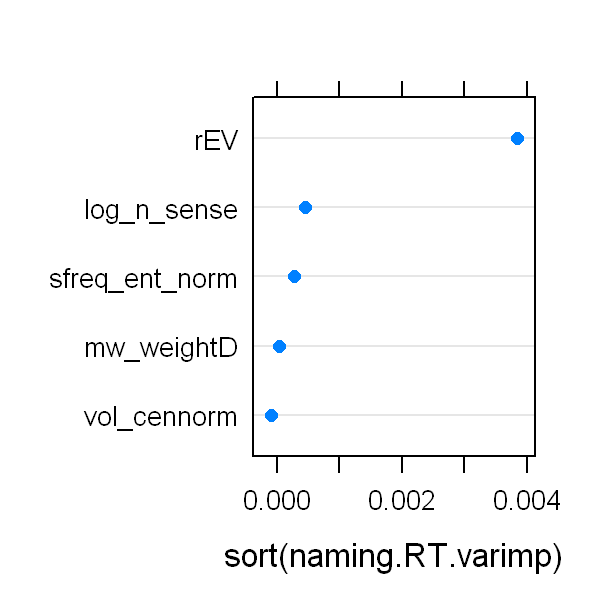

In [29]:
popt(3,3)
dotplot(sort(naming.RT.varimp), main=list(cex=2))

In [69]:
m.01 = bam(RTinv~s(log_freq)+s(log_n_sense)+s(sfreq_ent_norm)+s(rEV), data=naming)

In [70]:
summary(m.01)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm) + s(rEV)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.420015   0.003271  -434.1   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df      F p-value    
s(log_freq)       3.864  4.839 36.499 < 2e-16 ***
s(log_n_sense)    1.000  1.000  1.424 0.23293    
s(sfreq_ent_norm) 1.000  1.000  0.133 0.71505    
s(rEV)            1.000  1.000  7.179 0.00748 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.235   Deviance explained =   24%
fREML = -891.35  Scale est. = 0.013021  n = 1217

In [71]:
concurvity(m.01)

,para,s(log_freq),s(log_n_sense),s(sfreq_ent_norm),s(rEV)
worst,7.567851e-20,0.2639595,0.9904539,0.9772046,0.9905351
observed,7.567851e-20,0.2182586,0.6593875,0.7498160,0.8885286
estimate,7.567851e-20,0.1658200,0.5361839,0.7604780,0.8490422


In [107]:
m.02 = bam(RTinv~s(log_freq)+s(log_n_sense)+s(sfreq_ent_norm), data=naming)

In [108]:
summary(m.02)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.420015   0.003277  -433.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df      F  p-value    
s(log_freq)       3.803  4.765 41.088  < 2e-16 ***
s(log_n_sense)    1.627  2.054  8.092 0.000294 ***
s(sfreq_ent_norm) 1.561  1.928  4.073 0.019809 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.232   Deviance explained = 23.7%
fREML = -891.87  Scale est. = 0.01307   n = 1217

In [109]:
compareML(m.01, m.02)

m.01: RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm) + s(rEV)

m.02: RTinv ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm)

Model m.02 preferred: lower fREML score (0.521), and lower df (2.000).
-----
  Model     Score Edf Difference    Df
1  m.01 -891.3490   9                 
2  m.02 -891.8704   7     -0.521 2.000

AIC difference: -7.44, model m.01 has lower AIC.



Warning message in compareML(m.01, m.02):
"Only small difference in fREML...
"


## Semantic Ambiguity

In [117]:
naming$sa = naming$`Semantic Ambiguity Rating`
naming.sa.vars = c("sa", 
        "log_n_sense", "sfreq_ent_norm", "vol_cennorm",
        "mw_weightD", "rEV")
naming.sa.cf <- cforest(sa ~ ., data=naming[,naming.sa.vars])
naming.sa.varimp = varimp(naming.sa.cf)

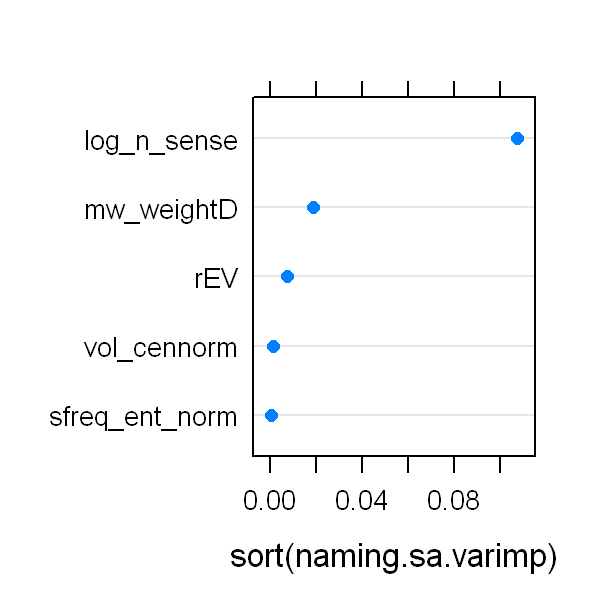

In [118]:
dotplot(sort(naming.sa.varimp), main=list(cex=2))

In [119]:
sa.01 = bam(sa~s(log_freq)+s(log_n_sense)+s(sfreq_ent_norm), data=naming)

In [120]:
summary(sa.01)


Family: gaussian 
Link function: identity 

Formula:
sa ~ s(log_freq) + s(log_n_sense) + s(sfreq_ent_norm)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.90677    0.01154   165.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                    edf Ref.df      F p-value    
s(log_freq)       4.451  5.523 80.672  <2e-16 ***
s(log_n_sense)    2.614  3.331 74.300  <2e-16 ***
s(sfreq_ent_norm) 1.000  1.000  0.002   0.969    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.499   Deviance explained = 50.2%
fREML = 637.12  Scale est. = 0.16218   n = 1217

In [125]:
sa.02 = bam(sa~s(log_freq)+s(log_n_sense)+s(mw_weightD), data=naming)

In [126]:
summary(sa.02)


Family: gaussian 
Link function: identity 

Formula:
sa ~ s(log_freq) + s(log_n_sense) + s(mw_weightD)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.90677    0.01149     166   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                 edf Ref.df      F p-value    
s(log_freq)    4.591  5.683 72.534  <2e-16 ***
s(log_n_sense) 2.460  3.163 39.780  <2e-16 ***
s(mw_weightD)  3.391  4.169  2.701  0.0277 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.503   Deviance explained = 50.8%
fREML = 633.67  Scale est. = 0.16062   n = 1217

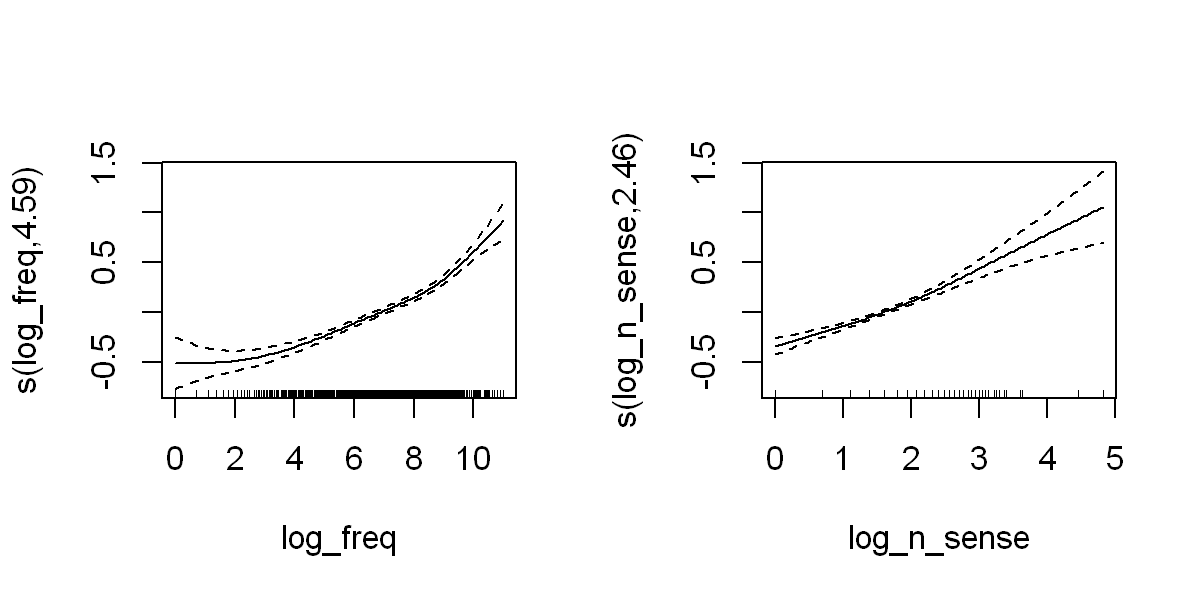

In [130]:
popt(6,3)
par(mfrow=c(1, 2))
plot(sa.02, select=1)
plot(sa.02, select=2)

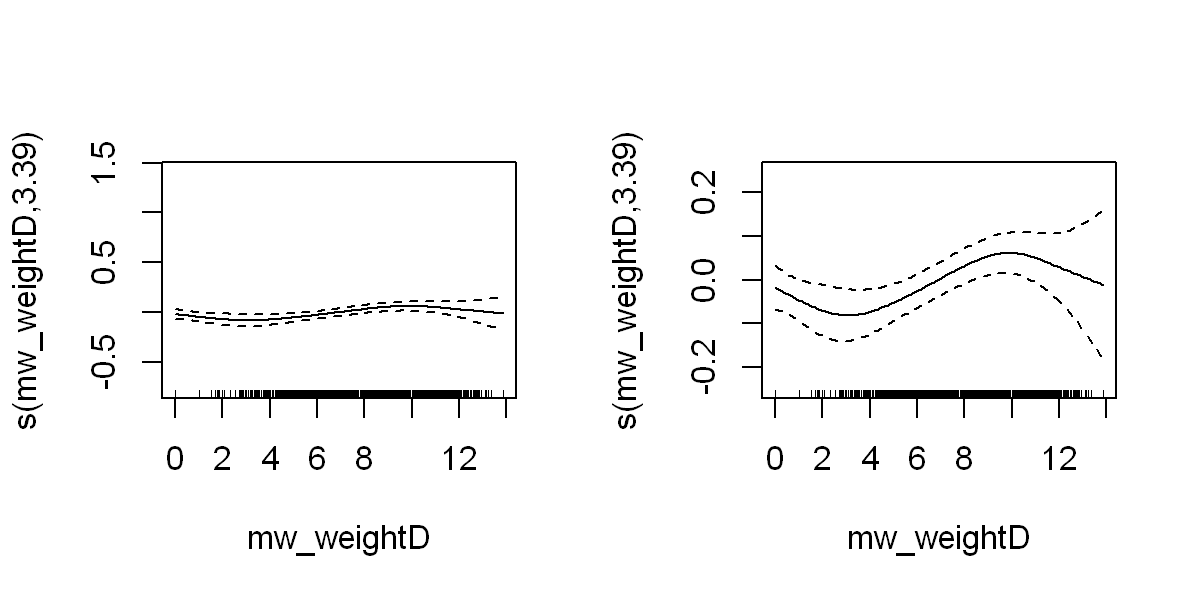

In [132]:
popt(6,3)
par(mfrow=c(1, 2))
plot(sa.02, select=3)
plot(sa.02, select=3, ylim=c(-0.25, 0.25))